In [1]:
import lib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Xc_val, yc_val, Xc_test, yc_test = lib.load_dataset("../dataset_clusterified")

In [28]:
import cv2

class ClusterifiedEstimator(lib.Estimator):
    def __init__(self, weighted, reduction, modifier=None):
        self.weighted = weighted
        self.reduction = reduction
        self.modifier = modifier

    def predict_one(self, img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        lines = lib.detect_lines(gray.astype(np.uint8))
        
        angle = lib.angle_from_lines(lines, self.weighted, reduction=self.reduction)
        
        if self.modifier is not None:
            angle = self.modifier(angle)
            
        return angle

In [54]:
def maxabs(x):
    mi = np.min(x)
    ma = np.max(x)
    
    if abs(ma) > abs(mi):
        return ma
    
    return mi

def maxabs_len(x):
    return maxabs(x) * len(x)

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s

def norm_tanh(x):
    return np.tanh(x) / np.tanh(1)

def norm_sigmoid(x):
    return (sigmoid(x) - 0.5) / sigmoid(1)

def norm_sinh(x):
    return np.sinh(x) / np.sinh(1)

In [55]:
for weighted in [False, True]:
    for reduction in [
        np.sum,
        maxabs,
        maxabs_len,
    ]:
        for modifier in [
            None,
            np.tanh,
            np.sinh,
            norm_tanh,
            norm_sinh,
            norm_sigmoid,
        ]:
            score = ClusterifiedEstimator(weighted, reduction, modifier=modifier).score(Xc_val, yc_val)
            print(f"score: {score} weighted: {weighted}, reduction: {reduction.__name__}, modifier: {modifier and modifier.__name__}")

score: (0.3168898526400779, 0.38182914533109247) weighted: False, reduction: sum, modifier: None
score: (0.24817316107322943, 0.3954368298044627) weighted: False, reduction: sum, modifier: tanh
score: (0.408415682104991, 0.4834883201735909) weighted: False, reduction: sum, modifier: sinh
score: (0.33896979545996186, 0.39579148665766145) weighted: False, reduction: sum, modifier: norm_tanh
score: (0.306799549751078, 0.3754243341193143) weighted: False, reduction: sum, modifier: norm_sinh
score: (0.295906175453218, 0.46965528734646234) weighted: False, reduction: sum, modifier: norm_sigmoid
score: (0.4189458215978799, 0.5482930275487115) weighted: False, reduction: maxabs, modifier: None
score: (0.4197825421558001, 0.5490163106985478) weighted: False, reduction: maxabs, modifier: tanh
score: (0.41859738683494546, 0.5480049718266391) weighted: False, reduction: maxabs, modifier: sinh
score: (0.40179629989597665, 0.5362947031839181) weighted: False, reduction: maxabs, modifier: norm_tanh
s

In [ ]:
plt.hist(yc_val)

In [ ]:
def plot_distrib(weighted, reduction, modifier):
    estimator = ClusterifiedEstimator(weighted, reduction, modifier=modifier)
    plt.hist([estimator.predict_one(x) for x in Xc_val])
    plt.title(f"weighted: {weighted}, reduction: {reduction}")

In [ ]:
plot_distrib(True, np.sum, norm_tanh)

In [ ]:
print(ClusterifiedEstimator(True, np.sum, lambda x: x if abs(x) > 0.25 else 0).score(Xc_val, yc_val))
plot_distrib(False, np.sum, lambda x: x if abs(x) > 0.25 else 0)

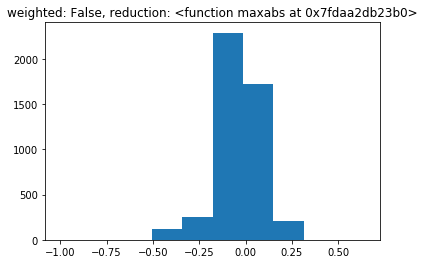

In [15]:
plot_distrib(False, maxabs)